# Fuente: Plataforma digital de datos abiertos (datos.gob.mx) | CSV: Transacciones de combustibles 2024    (CC by 4.0)

In [3]:
import time
import pandas as pd
from pandas import Series, DataFrame


t1 = time.time()
data = pd.read_csv('Historico_Precios_Expendios.csv_2024.csv')
t2 = time.time()
print(f'read_csv\(\) tomó: {t2-t1} segundos')
print(data.tail(30))


NameError: name 't2' is not defined

In [4]:
print(len(data))
data

13771848


,numeropermiso,subproducto,fecha,precio
0,PL/1000/EXP/ES/2015,Diésel Automotríz,2024-01-01,NaN
1,PL/1000/EXP/ES/2015,Diésel Automotríz,2024-01-02,NaN
2,PL/1000/EXP/ES/2015,Diésel Automotríz,2024-01-03,NaN
3,PL/1000/EXP/ES/2015,Diésel Automotríz,2024-01-04,NaN
4,PL/1000/EXP/ES/2015,Diésel Automotríz,2024-01-05,NaN
...,...,...,...,...
13771843,PL/9999/EXP/ES/2015,Regular,2024-12-27,22.86
13771844,PL/9999/EXP/ES/2015,Regular,2024-12-28,22.86
13771845,PL/9999/EXP/ES/2015,Regular,2024-12-29,22.86
13771846,PL/9999/EXP/ES/2015,Regular,2024-12-30,22.86


In [5]:
#nos preguntamos por el número de gasolinas distintas que se toman en cuenta.
categories = pd.unique(data['subproducto'])
print(len(categories))
print(categories)
#igual el numero de permisos
permisos = pd.unique(data['numeropermiso'])
print(len(permisos))

6
['Diésel Automotríz' 'Premium' 'Regular'
 'Diésel de Ultra Bajo Azufre (DUBA)' 'Diésel Agrícola/Marino'
 'Diésel Industrial']
13785


<AxesSubplot:title={'center':'Costo promedio en 2024'}, ylabel='subproducto'>

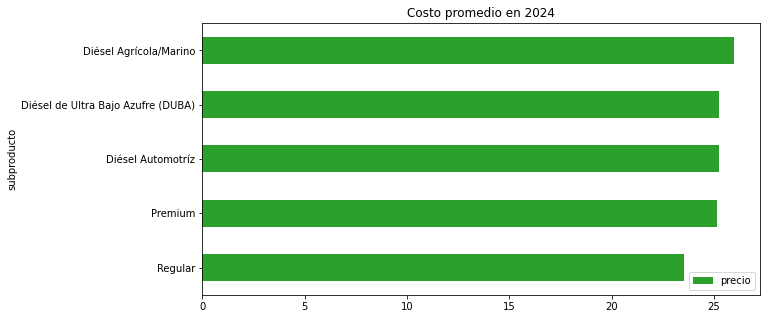

In [73]:
subp = data.pivot_table('precio', columns='subproducto', aggfunc='mean')
sub= subp.T
sub= sub.sort_values(by='precio')
sub.plot(title='Costo promedio en 2024', kind='barh', color = 'C2', figsize = (10,5))

## Ahora nos proponemos obtener precio de cada combustible a lo largo del año:

1. **Filtrar** las filas del arreglo original con lista de categorías para enfocarnos en cada combustible.
2. Ordenar temporalmente por la columna 'fecha', la opcion más brute es **separar** 'fecha' en tres columnas (o dos), la segunda opción es aprovechar el unicode pues en python debe funcionar la comparación del operador > y simplemete usar sort, la tercera opcion es darse cuenta que ya esta ordenadas por fecha por que así se generan los datos.
3. El problema es que hay muchos tipos de permiso, por lo que se deben **agrupar** los registros por fecha, elegimos promediar, aunque eso oscurece si cuánto varía el precio en cada permiso.

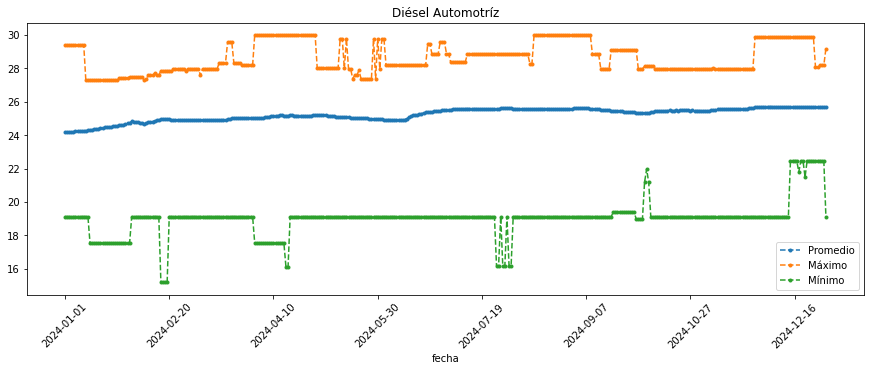

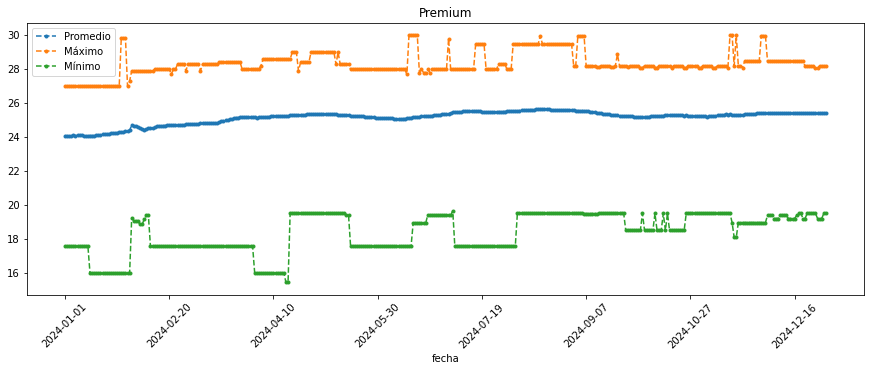

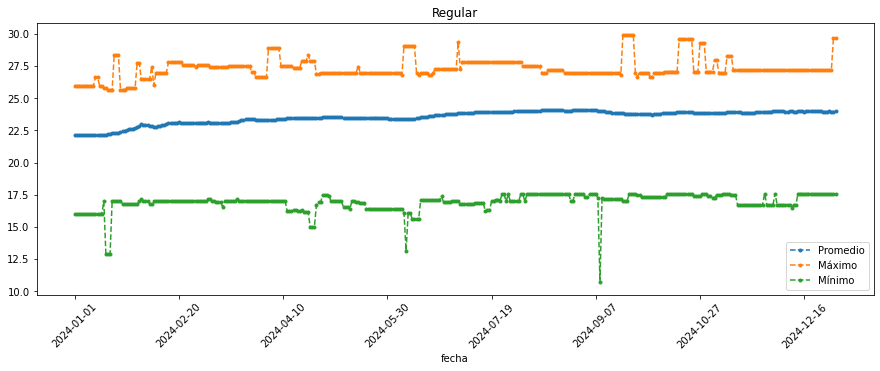

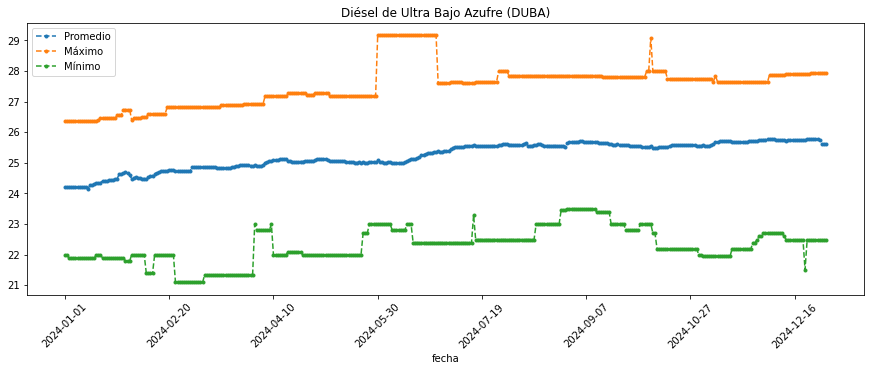

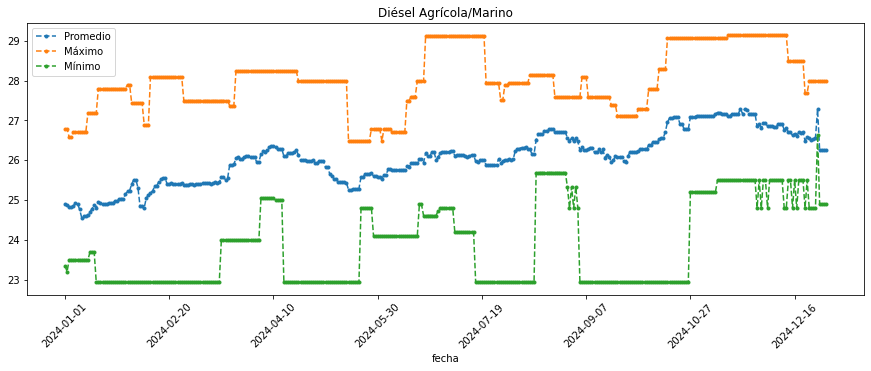

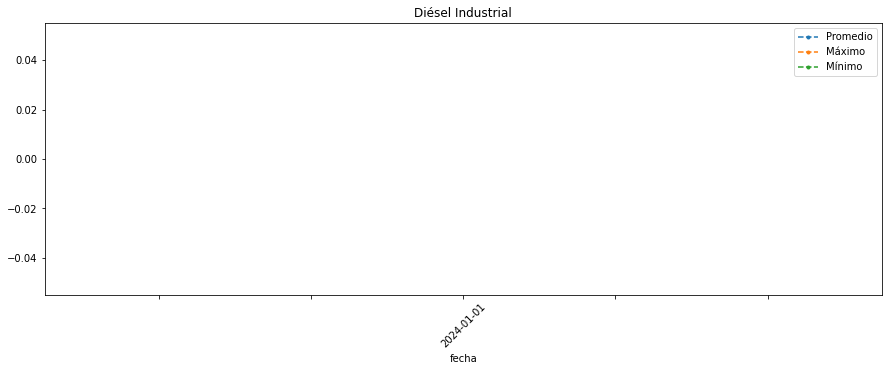

In [30]:
#graficar con pandas es la manera mas simple, pero incluye pocas opciones

ldf = []
j=0
for i in categories:

    res = data[data.subproducto == i]
    dummy = res['precio'].groupby(data['fecha'])
    
    
    means = dummy.agg('mean') #obtener: promedio, mínimo y máximo
    means.name = 'Promedio' #cambio en el nombre del DF
    
    sup = dummy.agg('max')
    sup.name = 'Máximo'
    
    inf = dummy.agg('min')
    inf.name = 'Mínimo'
    
    #pandas puede presentar todas las líneas de un dataframe
    precio_anual = pd.concat([means,sup,inf], axis=1)
    precio_anual.plot(kind='line',rot=45,title=i,figsize=(15,5),style='.--') 


#Conclusiones
1. El rango de precio por día de cada combustible varía casi 10 pesos en promedio.
2. Investigar la conformacion del nombre del permiso, que sea constante el mínimo remite a que sea constante en una región.
3. Todas las curvas promedio presentan un mínimo local a mediados de mayo
4. Una regresion lineal e

#### Graficar subplots con matplotlib implica convertir a arreglos de numpy
import matplotlib.pyplot as plt 

fig,axs = plt.subplots(6,1)
j=0
for i in categories:
    
    res = data[data.subproducto == i]
    dummy = res['precio'].groupby(data['fecha'])
    
    sup = dummy.agg(('max','max'))
    inf = dummy.agg(('min','min'))
    means = dummy.agg(('mean','mean'))
    
    xs = means['fecha'].to_numpy()
    ys = means['mean'].to_numpy()
    ys1 = sup['max'].to_numpy()
    ys2 = inf['max'].to_numpy()
    axs[j].plot(xs,ys1, alpha=0.5, color='r',linestyle=dashed)
    axs[j].plot(xs,ys2, alpha=0.5, color='b',linestyle=dashed)
    axs[j].scatter(xs,ys, linestyle='dashed', marker='x',color='k',label=None,rot=90)
    j += 1
    plt.show()